<a href="https://colab.research.google.com/github/oceanfishYU/Python_practise/blob/main/CNN(%E5%8D%B7%E7%A9%8D%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF)0608.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color = blue>1.抓資料

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets  import mnist

從keras.datasets裡面抓出mnist的資料

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

從mnist裡讀取資料，x_train,y_train為訓練資料，x_test,y_test為預測資料

In [ ]:
x_train.shape

(60000, 28, 28)

x_train(訓練用的資料)為60000張28*28像素的圖片

In [ ]:
y_train.shape

(60000,)

y_train(訓練用的答案)為60000筆資料

In [ ]:
x_test.shape

(10000, 28, 28)

x_test(預測用的資料)為10000張28*28像素的圖片

In [ ]:
y_test.shape

(10000,)

y_train(預測用的答案)為10000筆資料

In [ ]:
plt.imshow(x_train[88],cmap='Greys')

把x_train的第88張顯示出來，然後cmap='Greys'是把圖片改為灰階的

In [ ]:
y_train[88]

0

x_train的第88張的答案就是y_train的第88筆資料，答案是0

#<font color = blue>2.修改輸出值(one-hot-encoding)

把標準答案改成以下

0 => [1 0 0 0 0 0 0 0 0 0]

1 => [0 1 0 0 0 0 0 0 0 0]

2 => [0 0 1 0 0 0 0 0 0 0]

....

9 => [0 0 0 0 0 0 0 0 0 1]

In [ ]:
from keras.utils.np_utils import to_categorical

從keras.utils.np_utils的程式內取出to_categorical

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train = to_categorical(y_train)

把y_train丟進to_categorical裡修改(每個數字都變成10個(000000001...))

In [ ]:
y_train.shape

(60000, 10)

y_train就會變成60000個裡面有10個值的二維陣列，原本的0~8被改成

0 => [1 0 0 0 0 0 0 0 0 0]

1 => [0 1 0 0 0 0 0 0 0 0]

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

y_train裡面的資料就變成我們要的樣子了


#<font color = blue>3.建立卷積網路的模型

在輸入層前再加上卷積層

In [ ]:
from keras import models
from keras import layers

從keras裡面取出models和layers和layers兩個程式

In [ ]:
from keras.layers.pooling import MaxPooling2D
mymodel=models.Sequential()
mymodel.add(layers.Conv2D(32,(3,3),padding='same', activation='relu' , input_shape=(28,28,1)))
mymodel.add(layers.MaxPooling2D( (2,2) ) )
mymodel.add(layers.Conv2D(64,(3,3), activation='relu', padding='same') )
mymodel.add(layers.MaxPooling2D( (2,2) ) )

加一個Cov2D層=>mymodel.add(layers,Conv2D(32,(3,3),padding='same',input_shape=(28,28,1))


32是指有32個卷積核，然後每個是3*3的，padding(填充)same是指輸出圖片與原圖片大小一樣，因為經過卷積層處理後外圍會有沒數值的地方，如果不做填充的話輸出的圖就會比原來的小。activation是破壞線性，input_shapee=(28(長),28(寬),1(每個位子一個像素(因為是黑白圖所以是1，彩色是3)))在Cov2D裡面限定格式一定要是三維的尺寸。MaxPooling2D是池化，因為經過卷積後圖會很大，所以要用Maxpooling(2,2每次2乘2找最大的值變成一個方塊)來讓圖變小。


在做一次卷積，第二次有64個卷積核，因為是第二次了所以不用再寫一次input_shape。


In [ ]:
mymodel.add(layers.Flatten())

使用layers.Flatten()來拉平(一維化)

In [ ]:
mymodel.add(layers.Dense(64,activation='relu'))

增加一個全連結層這層有64個點

In [ ]:
mymodel.add(layers.Dense(32,activation='relu'))

增加一個全連結層這層有32個點

In [ ]:
mymodel.add(layers.Dense(10,activation='softmax'))

增加一個全連結層這層有10個點，因為是最後一層了所以用softmax來讓所有輸出的值加起來會等於1

In [ ]:
mymodel.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

compile函數定義損失函數(loss)=categorical_crossentropy和優化函數(optimizer)=adam

In [ ]:
mymodel.fit(x_train.reshape(-1,28,28,1) , y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 66s 139ms/step - loss: 0.7426 - accuracy: 0.8195
Epoch 2/10
469/469 [==============================] - 64s 136ms/step - loss: 0.1145 - accuracy: 0.9679
Epoch 3/10
469/469 [==============================] - 63s 134ms/step - loss: 0.0615 - accuracy: 0.9819
Epoch 4/10
469/469 [==============================] - 65s 139ms/step - loss: 0.0424 - accuracy: 0.9869
Epoch 5/10
469/469 [==============================] - 65s 139ms/step - loss: 0.0344 - accuracy: 0.9895
Epoch 6/10
469/469 [==============================] - 63s 134ms/step - loss: 0.0299 - accuracy: 0.9902
Epoch 7/10
469/469 [==============================] - 63s 134ms/step - loss: 0.0233 - accuracy: 0.9926
Epoch 8/10
469/469 [==============================] - 63s 134ms/step - loss: 0.0204 - accuracy: 0.9936
Epoch 9/10
469/469 [==============================] - 67s 144ms/step - loss: 0.0211 - accuracy: 0.9931
Epoch 10/10
469/469 [==============================] - 63s 135ms/step - l

訓練模型，這邊的reshape也要改成Conv2D要的格式，batch_size=128是一次做128筆資料，y_train,epochs=10是全部要做10次。如果做完再做一次的話會是第11次、第12次...，就是說你在執行一次的話不是從頭訓練。

In [ ]:
mymodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)               

通過model.summary()輸出模型各層的參數狀況，如下：
通過這些參數，可以看到模型各個層的組成（dense表示全連接層）。也能看到數據經過每個層後，輸出的數據維度。
還能看到Param，它表示每個層參數的個數

#<font color = blue>4.預測

In [ ]:
mypredict=mymodel.predict(x_test.reshape(-1,28,28,1))
mypredict

array([[2.00579562e-15, 6.94889621e-08, 1.08464837e-09, ...,
        9.99999642e-01, 2.46984424e-08, 2.57732864e-07],
       [1.21163008e-12, 7.43946744e-12, 1.00000000e+00, ...,
        3.59947280e-17, 3.62823148e-16, 4.45961841e-16],
       [3.64816408e-08, 9.99998569e-01, 2.01871178e-08, ...,
        8.57303064e-07, 4.27030272e-07, 1.56329689e-11],
       ...,
       [3.73091254e-18, 7.14392741e-08, 1.54782430e-14, ...,
        1.12540565e-05, 4.49593536e-08, 2.54570964e-09],
       [8.33722780e-08, 8.70480920e-14, 1.03079621e-20, ...,
        8.11272707e-13, 1.11551826e-08, 7.93062144e-12],
       [4.57352515e-12, 2.17371537e-11, 3.27679073e-12, ...,
        5.93306003e-12, 5.94626616e-13, 7.92014644e-20]], dtype=float32)

要預測的話要和訓練的時候一樣把資料變成一條一條的。

In [ ]:
y_test[0]

7

In [ ]:
predict_class=np.argmax(mypredict,axis=1)
predict_class

array([7, 2, 1, ..., 4, 5, 6])


使用np.argmax在陣列中找到最大的值，最大的值就是預測的答案，軸度是1(拆掉最外面外內一層的括號)

In [ ]:
predict_class != y_test

array([False, False, False, ..., False, False, False])

預測的答案如果不等於y_test的就是True(1)

In [ ]:
np.nonzero(predict_class != y_test)

(array([  62,  151,  160,  193,  320,  359,  448,  582,  583,  646,  684,
         881, 1014, 1039, 1112, 1156, 1181, 1182, 1232, 1260, 1319, 1393,
        1549, 1553, 1554, 1686, 1709, 1717, 1754, 1790, 1878, 1901, 2040,
        2043, 2129, 2130, 2135, 2182, 2189, 2237, 2293, 2329, 2387, 2414,
        2433, 2447, 2454, 2462, 2514, 2526, 2597, 2648, 2654, 2896, 2939,
        2953, 2970, 2995, 3060, 3062, 3225, 3267, 3288, 3316, 3369, 3422,
        3451, 3503, 3534, 3558, 3599, 3662, 3726, 3778, 3780, 3796, 3808,
        3850, 3926, 3941, 4017, 4078, 4163, 4176, 4265, 4284, 4289, 4306,
        4400, 4477, 4536, 4571, 4575, 4731, 4740, 4761, 4763, 4783, 4807,
        4879, 5127, 5201, 5617, 5631, 5654, 5676, 5936, 5937, 5955, 6091,
        6166, 6558, 6560, 6576, 6597, 6625, 6651, 6740, 7216, 7434, 7797,
        7902, 7991, 8059, 8094, 8095, 8325, 8408, 8527, 9015, 9530, 9634,
        9636, 9638, 9664, 9669, 9679, 9692, 9729, 9749, 9754, 9768, 9770,
        9792, 9811]),)

使用nonzero來找到預測與實際答案不符合的資料

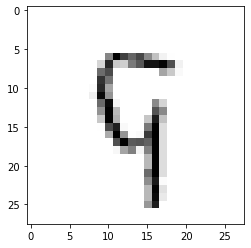

In [ ]:
plt.imshow(x_test[62],cmap='Greys')

62的圖片

In [ ]:
y_test[62]

9

62的答案是9

In [ ]:
predict_class[62]

5

模型預測62的答案是5

In [ ]:
1-np.count_nonzero(predict_class!=y_test)/10000

0.9855

1減掉nonzero找到的預測與實際答案不符合的資料然後用.count算答案不一樣的個數再除以10000(錯誤的機率)，就能算出正確的機率。


In [ ]:
y_test=to_categorical(y_test)

要先把y_test改成我們要的形式

In [ ]:
mymodel.evaluate(x_test.reshape(-1,28,28,1),y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.0578 - accuracy: 0.9855


[0.0578010268509388, 0.9854999780654907]

使用.evaluate找到錯誤的機率與正確的機率。

#<font color = blue>5.模型的儲存

In [ ]:
from google.colab import drive 
import os 
drive.mount('/content/gdrive',force_remount=True)
os.chdir('/content/gdrive/MyDrive/AIclass/')

Mounted at /content/gdrive


In [ ]:
mymodel.save('cnn_model.h5')